In [55]:
# homework_set_5.ipynb

## EE 351M Homework Set 5
# Eric Graves
# edg732
# Created 10/14/2019

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.io
import os

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

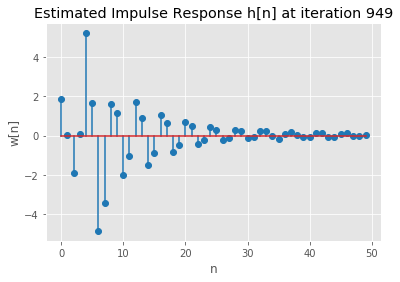

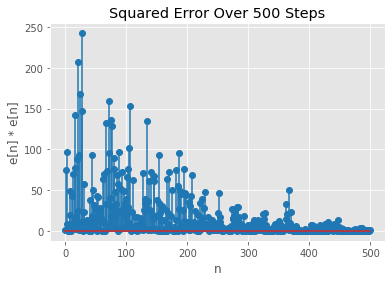

In [43]:
## Problem 5 a)
## transversal filter of length m = 50, and the LMS algorithm with parameter η = 0.01
## The length of the signal x[n] applied to the inputs of both the unknown system and 
## the transversal adaptive filter is 1000 samples.

# Load the data
data = scipy.io.loadmat('hw5p1mat.mat') # contains 2 arrays we care about: 'x':3 and 'd':4

# Extract the arrays, and transpose into useable arrays (otherwise len(d) == 1)
x = data.get('x').T # Input signal
d = data.get('d').T # Output signal (desired)

N = 1000 # Input size (in samples)
m = 50 # Filter size
eta = 0.01 # η

w = np.ones([m,1]) # Initial filter with all coefficients = 1
xn = np.zeros([N,1]) # Input signal
e = np.zeros(N-m)
e_sq = np.zeros(N-m)

# Run the LMS algorithm for the data we have
for n in range(0, N-m):
    
    xn = x[n+m:n:-1]
    en = d[n+m] - np.dot(xn.T , w) # Error
    w = w + eta * en * xn # Update filter (LMS algorithm)
    e[n] = en # Record error
    e_sq[n] = en*en 


# Plot
with plt.style.context('ggplot'): # Set style to be like R
    
    # 5a) Plot the Filter Coefficients to estimate the impulse response
    plt.figure()
    plt.title('Estimated Impulse Response h[n] at iteration %d' % n)
    plt.stem(w)

    plt.ylabel('w[n]') 
    plt.xlabel('n') 
    
    
    # 5b) Plot the squared error over the first 500 steps
    plt.figure()
    plt.title('Squared Error Over 500 Steps')
    plt.stem(e_sq[:500])

    plt.ylabel('e[n] * e[n]') 
    plt.xlabel('n') 
    
    # Style stuff below
    font = {'family': 'sans',
           'color':  'black',
           'weight': 'normal',
           'size': 16,
           }
    
    # 5c) This is an FIR filter. The impulse response is finite (the w[n] terms approach 0 as time goes on).
    